## Exploring Supervised Machine Learning
Here we will be seeing the use of Python scikit library as it contains a lot of efficient tools for machine learning and statistical modeling including classification, regression and clustering etc.

---
### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing necessary libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset from the URL

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Creating Data audit Report

In [6]:
# Using a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P25' ,'P50' ,'P75' ,'P99' ,'MAX'])

df_summary = df.apply(lambda x: var_summary(x)).T

In [7]:
df_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P25,P50,P75,P99,MAX
Hours,25.0,0.0,125.3,5.012,4.8,2.525094,6.376100,1.1,1.196,2.7,4.8,7.4,9.128,9.2
Scores,25.0,0.0,1287.0,51.480,47.0,25.286887,639.426667,17.0,17.720,30.0,47.0,75.0,93.320,95.0


In [8]:
# Correlation Matrix
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Conclusion** - This correlation matrix shows the two variables have high correlation. 
- We can observe this by plotting the two variables as well.

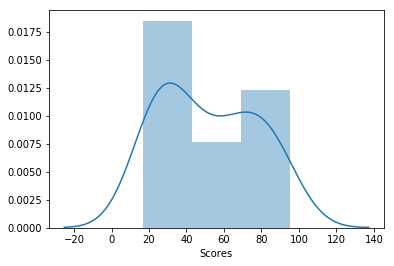

In [9]:
# Exploring distribution of variable
sns.distplot(df.Scores)

### Plotting the two variables

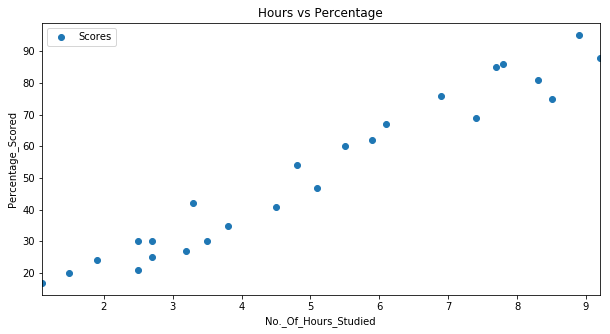

In [10]:
df.plot(x='Hours', y='Scores', style='o', title = 'Hours vs Percentage', figsize = (10,5))   
plt.xlabel('No._Of_Hours_Studied')  
plt.ylabel('Percentage_Scored')  
plt.show()

### Another way to visualize correlation among variables is using the heatmap

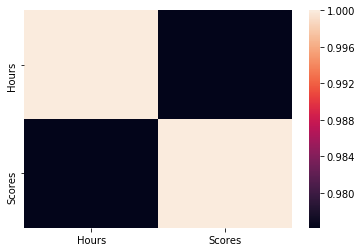

In [11]:
sns.heatmap(df.corr())

### Preparing the data
We divide the data into "attributes"(inputs) and "labels"(outputs)

In [33]:
# Dividing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting the data
We will split the data into training and testing datasets using Scikit-learn method train_test_split()

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                  test_size = 0.2,                 # 20% data kept for testing
                                                  random_state = 123 )

In [37]:
print(len( train_X ))
print(len( test_X))

20
5


### Training the test dataset

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(train_X, train_y) 

print("Training complete.")

Training complete.


In [40]:
line = regressor.coef_*X + regressor.intercept_
line

array([[26.69968587],
       [51.66415469],
       [33.42088901],
       [84.30999854],
       [36.30140465],
       [17.09796709],
       [91.03120168],
       [55.5048422 ],
       [82.38965478],
       [28.62002962],
       [76.62862351],
       [59.34552971],
       [45.90312342],
       [34.38106089],
       [13.25727958],
       [88.15068605],
       [26.69968587],
       [20.9386546 ],
       [61.26587347],
       [73.74810788],
       [28.62002962],
       [48.78363906],
       [39.18192028],
       [68.94724849],
       [77.58879539]])

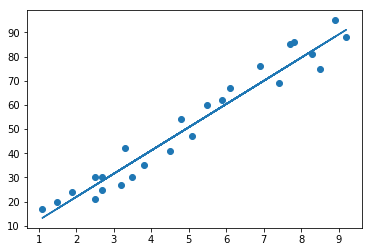

In [44]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [45]:
# Testing data in hours
print(test_X)                        

[[1.5]
 [4.8]
 [3.8]
 [6.1]
 [8.9]]


In [46]:
# Predicting the scores
pred_y = regressor.predict(test_X)
pred_y

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

In [47]:
# Comparing Actual vs Predicted outputs
dx = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  
dx 

,Actual,Predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


In [48]:
# Now, we predict the output for given value of hours of study
hours = 9.25
pred_new = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_new[0]))

No of Hours = 9.25
Predicted Score = 91.51128761861357


### Evaluating the model accuracy

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y)) 
print('Mean Square Error:', metrics.mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R-Square:', metrics.r2_score(test_y, pred_y))

Mean Absolute Error: 4.9767509236804015
Mean Square Error: 26.582796488881087
RMSE: 5.15585070467339
R-Square: 0.9605221627526419


In [50]:
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)

0.9605221627526419